Para el EDA, necesitamos responder cuales de las columnas de esta base de datos nos ayuda a lograr los objetivos del proyecto:

- Crear un sistema de recomendacion de videojuegos para usuarios con las consultas requeridas


Y cuales relacionan esta base con las otras bases. Esos seran nuestros objetivos en este EDA. Para este proposito tambien utilizaremos el nuevo Diccionario de Datos.

In [10]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from useful_tools import tipo_de_datos

In [2]:
# Cargar el conjunto de datos users_items
users_items = pd.read_parquet('users_items.parquet')

In [3]:
# Mostrar las primeras filas del DataFrame
print("Primeras y ultimas filas de user_reviews:")
users_items

Primeras y ultimas filas de user_reviews:


,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6,0
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0,0
2,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7,0
3,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,40,Deathmatch Classic,0,0
4,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...,...,...,...
5153204,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,346330,BrainBread 2,0,0
5153205,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,373330,All Is Dust,0,0
5153206,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,521570,You Have 10 Seconds 2,4,4


In [4]:
# Obtener información sobre el DataFrame
print("\nInformación de users_items:")
print(users_items.info())


Información de users_items:
<class 'pandas.core.frame.DataFrame'>
Index: 5094105 entries, 0 to 5153208
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   items_count       int64 
 2   steam_id          object
 3   user_url          object
 4   item_id           int64 
 5   item_name         object
 6   playtime_forever  int64 
 7   playtime_2weeks   int64 
dtypes: int64(4), object(4)
memory usage: 349.8+ MB
None


In [5]:
# Verificar la forma (número de filas y columnas) del DataFrame
print("\nForma de user_reviews:", users_items.shape)


Forma de user_reviews: (5094105, 8)


In [6]:
# Verificar valores faltantes en el DataFrame
print("\nValores faltantes en users_items:")
print(users_items.isnull().sum())


Valores faltantes en users_items:
user_id             0
items_count         0
steam_id            0
user_url            0
item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
dtype: int64


In [11]:
tipo_de_datos.datatype_per_column(users_items)

Columna 'user_id': [<class 'str'>]
Columna 'items_count': [<class 'int'>]
Columna 'steam_id': [<class 'str'>]
Columna 'user_url': [<class 'str'>]
Columna 'item_id': [<class 'int'>]
Columna 'item_name': [<class 'str'>]
Columna 'playtime_forever': [<class 'int'>]
Columna 'playtime_2weeks': [<class 'int'>]


Realizando estas consultas basicas vemos que el preprocesamiento de users_items ha sido hecho correctamente, ya que no hay objetos con tipos de datos que imposibiliten su utilizacion y tampoco hay datos faltantes.

Siendo asi pasamos a responder nuestras preguntas. Cuales de estas columnas nos ayudan con nuestro objetivo y cuales conectan a esta base con las demas? Separemos las que sí sirven y las que no:


SI

- user_id: Conecta esta base con user_reviews.parquet (user_id).
- items_count: es necesaria para la funcion userdata.
- item_id: Conecta con steam_games.parquet.parquet (id) y con user_reviews.parquet (item_id).
- item_name: Conecta con steam_games.parquet (app_name ó title).
- playtime_forever: importante para funcion UserForGenre.
- playtime_2weeks: posiblemente importante para sistema de recomendacion.


NO

- steam_id
- user_url

eliminaremos las columnas que no sirven.

In [12]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['user_url', 'steam_id']

# Eliminar las columnas del DataFrame user_reviews
users_items = users_items.drop(columnas_a_eliminar, axis=1)

In [13]:
# Mostrar las primeras filas del DataFrame
print("Primeras y ultimas filas de users_items:")
users_items

Primeras y ultimas filas de users_items:


,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,10,Counter-Strike,6,0
1,76561197970982479,277,20,Team Fortress Classic,0,0
2,76561197970982479,277,30,Day of Defeat,7,0
3,76561197970982479,277,40,Deathmatch Classic,0,0
4,76561197970982479,277,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...,...
5153204,76561198329548331,7,346330,BrainBread 2,0,0
5153205,76561198329548331,7,373330,All Is Dust,0,0
5153206,76561198329548331,7,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,7,521570,You Have 10 Seconds 2,4,4


Para encontrar outliers interesantes deberiamos analizar:
- Cantidad total de jugadores.
- Cantidad total de juegos.
- Cantidad de juegos por usuario.
- Cantidad de jugadores por juego.
- Cantidad de horas por jugador.
- Cantidad de horas por juego.
- juegos mas jugados en las ultimas dos semanas.
- jugadores con mas horas jugadas en las ultimas dos semanas.

Cantidad total de jugadores
70912
Cantidad total de juegos en users_items
10978


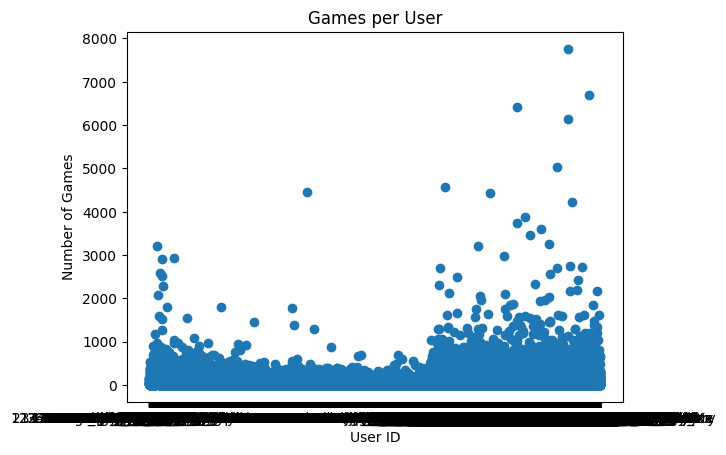

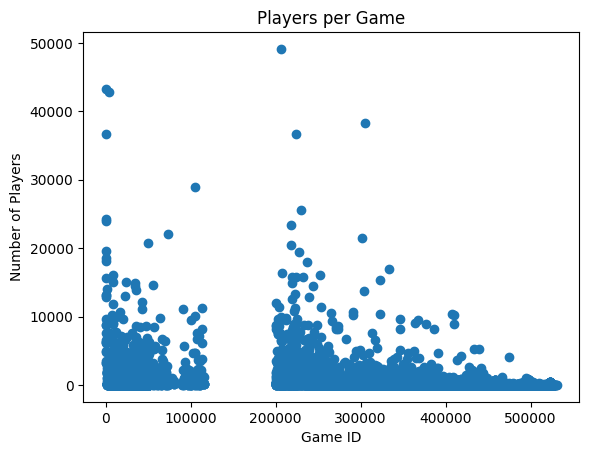

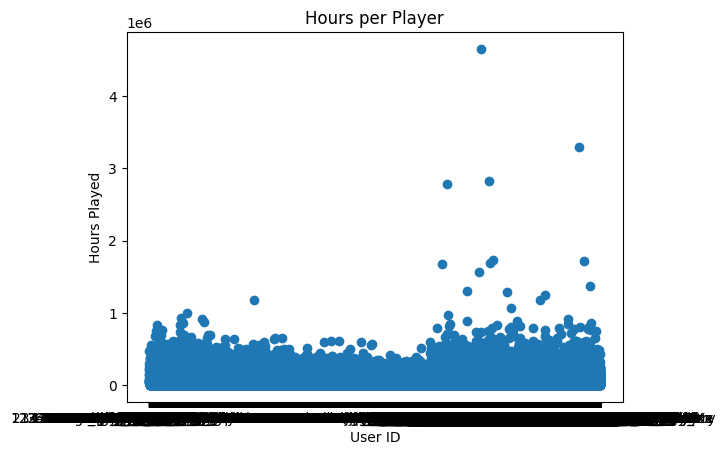

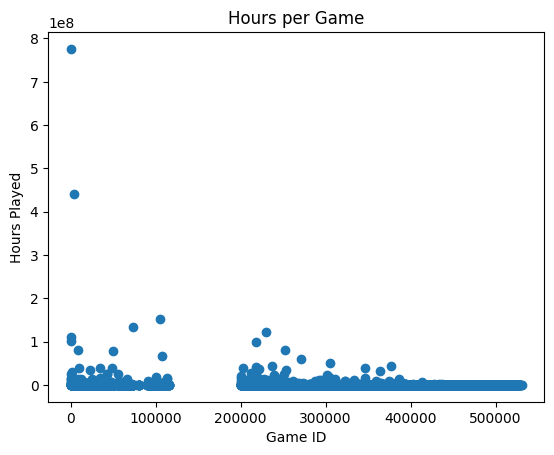

In [20]:
# Cantidad total de jugadores
players_count = users_items['user_id'].nunique()
print('Cantidad total de jugadores')
print(players_count)

# Cantidad total de juegos en users_items
games_count = users_items['item_id'].nunique()
print('Cantidad total de juegos en users_items')
print(games_count)

# Gráfico: Cantidad de juegos por usuario (scatter plot)
games_per_user = users_items.groupby('user_id')['item_id'].nunique()
plt.scatter(games_per_user.index, games_per_user.values)
plt.title('Games per User')
plt.xlabel('User ID')
plt.ylabel('Number of Games')
plt.show()

# Gráfico: Cantidad de jugadores por juego (scatter plot)
players_per_game = users_items.groupby('item_id')['user_id'].nunique()
plt.scatter(players_per_game.index, players_per_game.values)
plt.title('Players per Game')
plt.xlabel('Game ID')
plt.ylabel('Number of Players')
plt.show()

# Gráfico: Cantidad de horas por jugador (scatter plot)
hours_per_player = users_items.groupby('user_id')['playtime_forever'].sum()
plt.scatter(hours_per_player.index, hours_per_player.values)
plt.title('Hours per Player')
plt.xlabel('User ID')
plt.ylabel('Hours Played')
plt.show()

# Gráfico: Cantidad de horas por juego (scatter plot)
hours_per_game = users_items.groupby('item_id')['playtime_forever'].sum()
plt.scatter(hours_per_game.index, hours_per_game.values)
plt.title('Hours per Game')
plt.xlabel('Game ID')
plt.ylabel('Hours Played')
plt.show()